<a href="https://colab.research.google.com/github/w2j1y12/pdm17/blob/main/py-tensorflow/DL2-CNN/dl2_01_mnist_CNN_start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN model of mnist dataset**
- Conv2D + FCN
    * Conv2D : 2차원 합성곱 필터링 + 풀링(Pooling)
    - > 2차원 필터로 영상을 대표하는 특징을 추출
    * FCN : 1차원 완전연결신경망
    - > Conv2D에서 추출된 대표 특징들을 이용하여 FCN으로 최종 학습 완료

***

![mnist_NN_2_layers](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

(source: https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdJp5Z6%2FbtqAPebnF3x%2FQCe5vVcskhmxe964bGz4iK%2Fimg.png)

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

print(tf.__version__)

2.7.0


## **데이터 로딩, 정규화**

In [3]:
from keras.datasets import mnist

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

# Reshape
X_train = X_train0.reshape(60000,28,28,1)
X_test = X_test0.reshape(10000,28,28,1)

# Normalization
X_train, X_test = X_train/255.0, X_test/255.0 # 정규화

print("X_train={0}".format(X_train.shape))
print("y_train={0}".format(y_train0.shape)) 
print("X_test={0}".format(X_test.shape))
print("y_test={0}".format(y_test0.shape))

11501568/11490434 [==============================] - 0s 0us/step
X_train=(60000, 28, 28, 1)
y_train=(60000,)
X_test=(10000, 28, 28, 1)
y_test=(10000,)


In [4]:
# One-Hot-Encoding
# Use function to_categorical() to do One-Hot-Encoding
# tf.keras.utils.to_categorical
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train0, 10)
y_test = to_categorical(y_test0, 10)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

### Display numbers
- 10 representative numbers

(5923, 28, 28)
(6742, 28, 28)
(5958, 28, 28)
(6131, 28, 28)
(5842, 28, 28)
(5421, 28, 28)
(5918, 28, 28)
(6265, 28, 28)
(5851, 28, 28)
(5949, 28, 28)


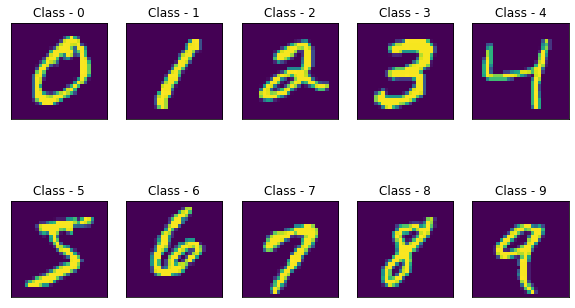

In [5]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]
fig = plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    num0_9 = X_train0[y_train0 == i]
    print(num0_9.shape)
    plt.imshow(num0_9[0]) #, cmap='gray') #, interpolation='none')
    plt.title("Class - %d" % (i))
    plt.xticks([])
    plt.yticks([])

# 대표 숫자 출력

# Design CNN

### import Conv2D, MaxPool2D

In [6]:
from keras.layers import Conv2D, MaxPool2D, Flatten

## **CNN1 + FCN2**
- CNN1: Conv2D + MaxPooling2D
- FCN2: Dense(128) + Output(10) 

In [7]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [15]:
c1f2 = keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 32, # 32 * 28 * 28
            kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), # 차원 축소시켜줌
    Flatten(), # 2차원 풀링을 1차원으로 바꿔야 해 왜냐면 FCN은 2차원을 못 받아들여
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dropout(0.25), 
    keras.layers.Dense(10, activation='softmax') # 출력 레이어/ 0과 1사이 softmax
])

c1f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

# 순차모델 

In [17]:
c1f2.summary() # 파라미터가 320개인 이유 3*3*32+32 -> 3x3 히든 레이어에 32개 뉴런

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               802944    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [11]:
3*3*32+32

320

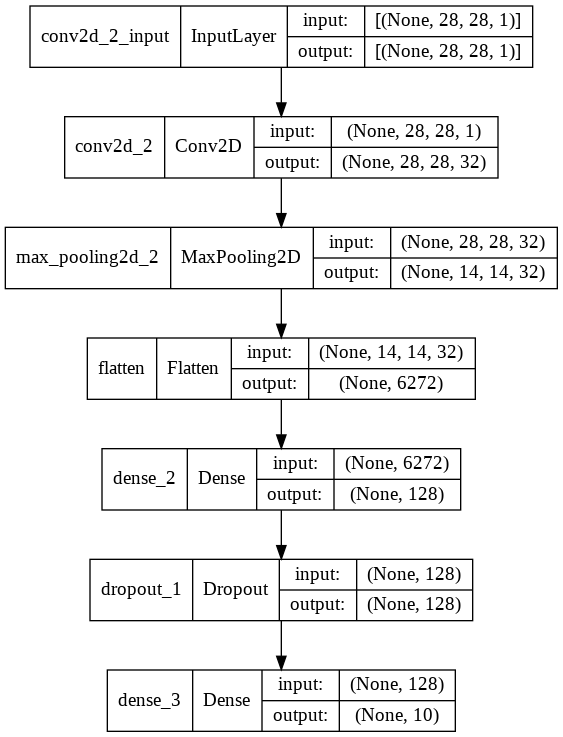

In [16]:
# Plot model
from tensorflow.keras.utils import plot_model
plot_model(c1f2, show_shapes=True, show_layer_names=True, to_file='model_c1f2.png')

In [18]:
# c1f2 모델 훈련 시키는 거래
c1f2.fit(X_train, y_train, epochs = 20,  batch_size = 100, 
            validation_data = (X_test, y_test))
# ValueError: Shapes (100, 10) and (100, 14, 14, 10) are incompatible -> 위에 Flatten()

Epoch 1/20
600/600 [==============================] - 35s 8ms/step - loss: 0.2245 - accuracy: 0.9350 - val_loss: 0.0729 - val_accuracy: 0.9764
Epoch 2/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0750 - accuracy: 0.9779 - val_loss: 0.0511 - val_accuracy: 0.9838
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0523 - accuracy: 0.9841 - val_loss: 0.0460 - val_accuracy: 0.9847
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0404 - accuracy: 0.9880 - val_loss: 0.0391 - val_accuracy: 0.9863
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0324 - accuracy: 0.9893 - val_loss: 0.0364 - val_accuracy: 0.9872
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0269 - accuracy: 0.9916 - val_loss: 0.0354 - val_accuracy: 0.9882
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0220 - accuracy: 0.9927 - val_loss: 0.0386 - val_accuracy: 0.9870
Epoch

In [19]:
c1f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0467 - accuracy: 0.9893


[0.046746570616960526, 0.989300012588501]

---

## **CNN1 + FCN3**

In [20]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [26]:
c1f3 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 32, # 32 * 28 * 28
           kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), # 차원 축소시켜줌
    Flatten(),
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),  
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

# fcn3 = tf.keras.models.Sequential([ 
#     tf.keras.layers.Flatten(input_shape=(28, 28)),
#     tf.keras.layers.Dense(256, activation='relu'),  
#     tf.keras.layers.Dropout(0.25),
#     tf.keras.layers.Dense(128, activation='relu'),  
#     tf.keras.layers.Dropout(0.25), 
#     tf.keras.layers.Dense(10, activation='softmax')
# ])

c1f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [27]:
c1f3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_10 (Flatten)        (None, 6272)              0         
                                                                 
 flatten_11 (Flatten)        (None, 6272)              0         
                                                                 
 dense_19 (Dense)            (None, 256)               1605888   
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                      

In [29]:
c1f3.fit(X_train,y_train, epochs= 20 , batch_size = 100)

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.2561 - accuracy: 0.9208
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0806 - accuracy: 0.9753
Epoch 3/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0499 - accuracy: 0.9851
Epoch 4/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0375 - accuracy: 0.9881
Epoch 5/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0308 - accuracy: 0.9901
Epoch 6/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0237 - accuracy: 0.9926
Epoch 7/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0203 - accuracy: 0.9936
Epoch 8/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0165 - accuracy: 0.9946
Epoch 9/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0141 - accuracy: 0.9954
Epoch 10/20
600/600 [==============================] - 5s 8ms/step - loss: 0.0123 - accuracy: 0.9961

In [31]:
c1f3.evaluate(X_test, y_test, batch_size= 100)

100/100 [==============================] - 1s 4ms/step - loss: 0.0465 - accuracy: 0.9896


[0.046464912593364716, 0.9896000027656555]

## **CNN2 + FCN2**

In [60]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [61]:
c2f2 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 64,
           kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(filters= 32, 
           kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(10, activation='softmax')
])

c2f2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [39]:
c2f2.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 1568)              0         
                                                                 
 dense_36 (Dense)            (None, 128)             

In [40]:
c2f2.fit(X_train, y_train, epochs = 20 , batch_size = 100)

Epoch 1/20
600/600 [==============================] - 6s 9ms/step - loss: 0.2207 - accuracy: 0.9326
Epoch 2/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0666 - accuracy: 0.9800
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0465 - accuracy: 0.9858
Epoch 4/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0365 - accuracy: 0.9885
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0303 - accuracy: 0.9903
Epoch 6/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0256 - accuracy: 0.9920
Epoch 7/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0224 - accuracy: 0.9928
Epoch 8/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0181 - accuracy: 0.9943
Epoch 9/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0167 - accuracy: 0.9944
Epoch 10/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0155 - accuracy: 0.9948

In [41]:
c2f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0267 - accuracy: 0.9928


[0.026699459180235863, 0.9927999973297119]

## **CNN2 + FCN3**

In [42]:
# Random number seed
np.random.seed(1234)
tf.random.set_seed(1234)

In [43]:
c2f3 = tf.keras.models.Sequential([ 
    Conv2D(input_shape=(28,28,1), filters= 64,
           kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Conv2D(filters= 32, 
           kernel_size=(3,3),strides=(1,1),padding='same',activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)), 
    Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dropout(0.25), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation='softmax')
])

c2f3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

In [44]:
c2f3.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 flatten_19 (Flatten)        (None, 1568)              0         
                                                                 
 dense_38 (Dense)            (None, 128)             

In [45]:
c2f3.fit(X_train, y_train, epochs=20, batch_size = 100)

Epoch 1/20
600/600 [==============================] - 7s 10ms/step - loss: 0.3016 - accuracy: 0.9074
Epoch 2/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0896 - accuracy: 0.9740
Epoch 3/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0625 - accuracy: 0.9823
Epoch 4/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0500 - accuracy: 0.9858
Epoch 5/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0410 - accuracy: 0.9876
Epoch 6/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0358 - accuracy: 0.9898
Epoch 7/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0327 - accuracy: 0.9904
Epoch 8/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0266 - accuracy: 0.9920
Epoch 9/20
600/600 [==============================] - 5s 9ms/step - loss: 0.0236 - accuracy: 0.9928
Epoch 10/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0222 - accuracy: 0.993

In [46]:
c2f3.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 6ms/step - loss: 0.0294 - accuracy: 0.9931


[0.02940288931131363, 0.9930999875068665]

# **[DIY] Hidden layer에 따른 정확도**

In [47]:
c1f3.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 1s 5ms/step - loss: 0.0465 - accuracy: 0.9896


[0.046464912593364716, 0.9896000027656555]

In [48]:
c1f2.evaluate(X_test, y_test, batch_size = 100)

100/100 [==============================] - 0s 4ms/step - loss: 0.0467 - accuracy: 0.9893


[0.046746570616960526, 0.989300012588501]

In [50]:
# Try another method!!
fcn_result = [[0.08733399957418442, 0.9789999723434448], 
 [0.046464912593364716, 0.9896000027656555], 
 [0.06836291402578354, 0.984000027179718], 
 [0.08842429518699646, 0.9807000160217285]]

In [51]:
# select accuracies
accuracy = [row[1] for row in fcn_result]
accuracy

[0.9789999723434448, 0.9896000027656555, 0.984000027179718, 0.9807000160217285]

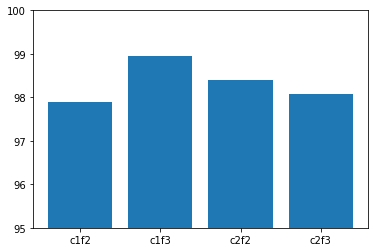

In [54]:
x = np.arange(4)
cnns = ['c1f2','c1f3','c2f2','c2f3']
accuracies = [acc*100 for acc in accuracy] # %

plt.bar(x, accuracies)
plt.xticks(x, cnns)
plt.ylim((95,100))
plt.show()

## 모형의 저장

- 트레이닝이 끝난 모형은 save 메서드로 가중치와 함께 hdf5 형식으로 저장
- load 명령으로 불러 사용

In [56]:
c2f2.save('c2f2_best.hdf5')

In [57]:
from keras.models import load_model

model = load_model('fcn3_best.hdf5')
model.evaluate(X_test, y_test, batch_size=32)

313/313 [==============================] - 2s 5ms/step - loss: 0.0267 - accuracy: 0.9928


[0.02669946290552616, 0.9927999973297119]

## C2F2 모델에 대한 loss, accuracy 그래프를 그리시오.

In [62]:
hist = c2f2.fit(X_train, y_train, 
         epochs = 20 , 
         batch_size =100, 
         validation_data=(X_test,y_test))
# 다시 위로 올라가서 한 번 더 c2f2 실행시켜줘야함

Epoch 1/20
600/600 [==============================] - 7s 10ms/step - loss: 0.2206 - accuracy: 0.9330 - val_loss: 0.0515 - val_accuracy: 0.9838
Epoch 2/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0666 - accuracy: 0.9798 - val_loss: 0.0360 - val_accuracy: 0.9882
Epoch 3/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0467 - accuracy: 0.9857 - val_loss: 0.0302 - val_accuracy: 0.9898
Epoch 4/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0372 - accuracy: 0.9885 - val_loss: 0.0292 - val_accuracy: 0.9897
Epoch 5/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0298 - accuracy: 0.9907 - val_loss: 0.0292 - val_accuracy: 0.9904
Epoch 6/20
600/600 [==============================] - 6s 10ms/step - loss: 0.0256 - accuracy: 0.9919 - val_loss: 0.0238 - val_accuracy: 0.9920
Epoch 7/20
600/600 [==============================] - 6s 9ms/step - loss: 0.0229 - accuracy: 0.9927 - val_loss: 0.0234 - val_accuracy: 0.9925
E

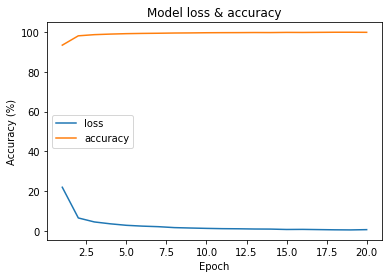

In [63]:
# Plot loass and accuracy
# Plot training & validation accuracy values
epochs = 20
loss_list = [100 * i for i in hist.history['loss']]
acc_list = [100 * i for i in hist.history['accuracy']]
plt.plot(range(1,epochs+1),loss_list) 
plt.plot(range(1,epochs+1),acc_list) 
plt.title('Model loss & accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='center left')

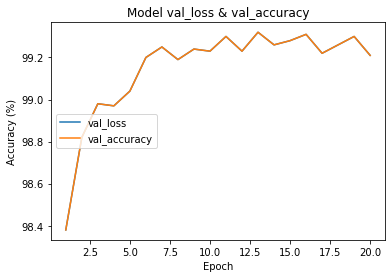

In [67]:
vloss_list=[100* i for i in hist.history['val_accuracy']]
vacc_list=[100* i for i in hist.history['val_accuracy']]
plt.plot(range(1,epochs+1),vloss_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('Model val_loss & val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['val_loss', 'val_accuracy'], loc='center left')

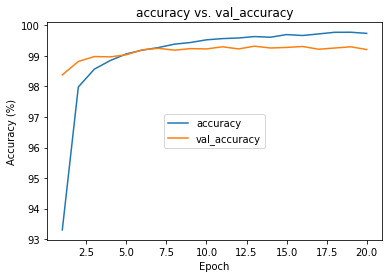

In [68]:
plt.plot(range(1,epochs+1),acc_list)  
plt.plot(range(1,epochs+1),vacc_list)  
plt.title('accuracy vs. val_accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.legend(['accuracy','val_accuracy'], loc='center')

***

## [DIY] C2F3 모델에 대한 loss, accuracy 그래프를 추가하시오.

In [ ]:
# Code here!